In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv('IMDB_Top_1000.csv')

In [36]:
df.head()

,Unnamed: 0,Movie_name,Year,Metascore,IMDB_score,Movie_rating,Votes,Domestic_gross,Director,Genres
0,0,The Trial of the Chicago 7,2020,76.0,7.9,R,52481,NaN,Aaron Sorkin,"Drama, History, Thriller"
1,1,Halloween,1978,87.0,7.8,R,229905,47.00,John Carpenter,"Horror, Thriller"
2,2,Tenet,2020,69.0,7.8,PG-13,143680,53.80,Christopher Nolan,"Action, Sci-Fi"
3,3,The Untouchables,1987,79.0,7.9,R,276672,76.27,Brian De Palma,"Crime, Drama, Thriller"
4,4,The Nightmare Before Christmas,1993,82.0,8.0,PG,293203,75.08,Henry Selick,"Animation, Family, Fantasy"


In [37]:
df.isnull().sum()

Unnamed: 0          0
Movie_name          0
Year                0
Metascore         154
IMDB_score          0
Movie_rating       14
Votes               0
Domestic_gross    160
Director            0
Genres              0
dtype: int64

In [38]:
df.drop(['Metascore', 'Votes'], axis = 1, inplace = True)

In [39]:
#Turning off the options that limits the display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [40]:
#Since we had several genres that apply to each movie, we split them by primary and secondary genres
df['Primary_Genre'] = df.Genres.str.split(',', n = 1, expand = True)[0]
df['Secondary_Genre'] = df.Genres.str.split(',', n = 1, expand = True)[1]

In [41]:
#Now we're seeing how many movies are in each genre
df['Primary_Genre'].value_counts()

Drama                   205
Action                  172
Comedy                  144
Crime                   107
Biography                85
Animation                83
Drama                    83
Adventure                72
Mystery                  13
Comedy                   13
Horror                    9
Western                   4
Film-Noir                 3
Fantasy                   2
Family                    2
Horror                    2
Thriller                  1
Name: Primary_Genre, dtype: int64

In [42]:
#creating individual dataframes for each genre to make plotting easier
drama_df = df[(df['Primary_Genre'] == 'Drama')]
action_df = df[(df['Primary_Genre'] == 'Action')]
comedy_df = df[(df['Primary_Genre'] == 'Comedy')]
crime_df = df[(df['Primary_Genre'] == 'Crime')]
bio_df = df[(df['Primary_Genre'] == 'Biography')]

In [43]:
drama_df.head()

,Unnamed: 0,Movie_name,Year,IMDB_score,Movie_rating,Domestic_gross,Director,Genres,Primary_Genre,Secondary_Genre
0,0,The Trial of the Chicago 7,2020,7.9,R,NaN,Aaron Sorkin,"Drama, History, Thriller",Drama,"History, Thriller"
10,10,The Shining,1980,8.4,R,44.02,Stanley Kubrick,"Drama, Horror",Drama,Horror
18,18,1917,2019,8.3,R,159.23,Sam Mendes,"Drama, War",Drama,War
29,29,Rebecca,1940,8.1,Approved,4.36,Alfred Hitchcock,"Drama, Mystery, Romance",Drama,"Mystery, Romance"
39,39,Little Women,2019,7.8,PG,108.10,Greta Gerwig,"Drama, Romance",Drama,Romance


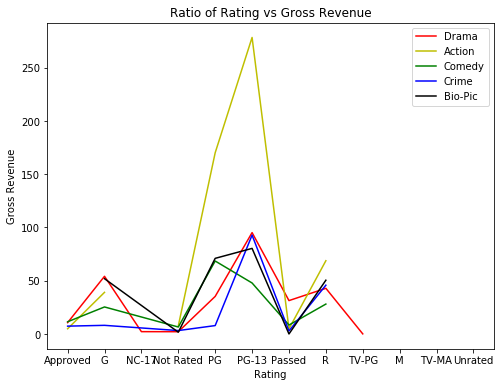

In [44]:
y1 = drama_df.groupby(['Movie_rating'])['Domestic_gross'].mean()
x1 = y1.index

y2 = action_df.groupby(['Movie_rating'])['Domestic_gross'].mean()
x2 = y2.index

y3 = comedy_df.groupby(['Movie_rating'])['Domestic_gross'].mean()
x3 = y3.index

y4 = crime_df.groupby(['Movie_rating'])['Domestic_gross'].mean()
x4 = y4.index

y5 = bio_df.groupby(['Movie_rating'])['Domestic_gross'].mean()
x5 = y5.index

plt.figure(figsize = (8,6))

plt.plot(x1,y1,'r',label = 'Drama')
plt.plot(x2,y2,'y',label = 'Action')
plt.plot(x3,y3,'g',label = 'Comedy')
plt.plot(x4,y4,'b',label = 'Crime')
plt.plot(x5, y5,'k',label = 'Bio-Pic') 

plt.legend()

plt.title('Ratio of Rating vs Gross Revenue')
plt.ylabel('Gross Revenue')
plt.xlabel('Rating')
plt.show()

<BarContainer object of 7 artists>

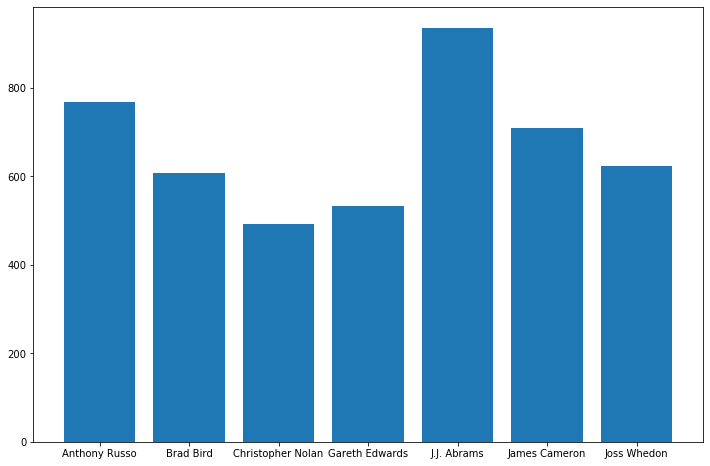

In [64]:
plt.figure(figsize = (12,8))
y = director_df.groupby(['Director'])['Domestic_gross'].mean()
x = y.index
plt.bar(x,y)

In [65]:
df.sort_values(by=['Domestic_gross', 'Director'], ascending = False).head(10)

,Unnamed: 0,Movie_name,Year,IMDB_score,Movie_rating,Domestic_gross,Director,Genres,Primary_Genre,Secondary_Genre
166,166,Star Wars: Episode VII - The Force Awakens,2015,7.9,PG-13,936.66,J.J. Abrams,"Action, Adventure, Sci-Fi",Action,"Adventure, Sci-Fi"
22,22,Avengers: Endgame,2019,8.4,PG-13,858.37,Anthony Russo,"Action, Adventure, Drama",Action,"Adventure, Drama"
111,111,Avatar,2009,7.8,PG-13,760.51,James Cameron,"Action, Adventure, Fantasy",Action,"Adventure, Fantasy"
92,92,Avengers: Infinity War,2018,8.4,PG-13,678.82,Anthony Russo,"Action, Adventure, Sci-Fi",Action,"Adventure, Sci-Fi"
42,42,Titanic,1997,7.8,PG-13,659.33,James Cameron,"Drama, Romance",Drama,Romance
155,155,The Avengers,2012,8.0,PG-13,623.28,Joss Whedon,"Action, Adventure, Sci-Fi",Action,"Adventure, Sci-Fi"
316,316,Incredibles 2,2018,7.6,PG,608.58,Brad Bird,"Animation, Action, Adventure",Animation,"Action, Adventure"
37,37,The Dark Knight,2008,9.0,PG-13,534.86,Christopher Nolan,"Action, Crime, Drama",Action,"Crime, Drama"
126,126,Rogue One: A Star Wars Story,2016,7.8,PG-13,532.18,Gareth Edwards,"Action, Adventure, Sci-Fi",Action,"Adventure, Sci-Fi"
79,79,The Dark Knight Rises,2012,8.4,PG-13,448.14,Christopher Nolan,"Action, Adventure",Action,Adventure


In [60]:
director_df = df.sort_values(by=['Domestic_gross', 'Director'], ascending = False).head(10)
director_df

,Unnamed: 0,Movie_name,Year,IMDB_score,Movie_rating,Domestic_gross,Director,Genres,Primary_Genre,Secondary_Genre
166,166,Star Wars: Episode VII - The Force Awakens,2015,7.9,PG-13,936.66,J.J. Abrams,"Action, Adventure, Sci-Fi",Action,"Adventure, Sci-Fi"
22,22,Avengers: Endgame,2019,8.4,PG-13,858.37,Anthony Russo,"Action, Adventure, Drama",Action,"Adventure, Drama"
111,111,Avatar,2009,7.8,PG-13,760.51,James Cameron,"Action, Adventure, Fantasy",Action,"Adventure, Fantasy"
92,92,Avengers: Infinity War,2018,8.4,PG-13,678.82,Anthony Russo,"Action, Adventure, Sci-Fi",Action,"Adventure, Sci-Fi"
42,42,Titanic,1997,7.8,PG-13,659.33,James Cameron,"Drama, Romance",Drama,Romance
155,155,The Avengers,2012,8.0,PG-13,623.28,Joss Whedon,"Action, Adventure, Sci-Fi",Action,"Adventure, Sci-Fi"
316,316,Incredibles 2,2018,7.6,PG,608.58,Brad Bird,"Animation, Action, Adventure",Animation,"Action, Adventure"
37,37,The Dark Knight,2008,9.0,PG-13,534.86,Christopher Nolan,"Action, Crime, Drama",Action,"Crime, Drama"
126,126,Rogue One: A Star Wars Story,2016,7.8,PG-13,532.18,Gareth Edwards,"Action, Adventure, Sci-Fi",Action,"Adventure, Sci-Fi"
79,79,The Dark Knight Rises,2012,8.4,PG-13,448.14,Christopher Nolan,"Action, Adventure",Action,Adventure
